### Homework 4

In [41]:
import statsmodels.stats.api as sms
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from scipy.stats import shapiro
from scipy.stats import levene
from scipy import stats
import statsmodels.api as sm

In [19]:
df=pd.read_csv("hmelq.csv")
df.head()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,0,81200,18834.0,108355.0,HomeImp,NaN,28.0,0.0,0.0,139.14,0.0,14.0,34.042
1,0,12600,103960.0,127384.0,DebtCon,NaN,2.0,0.0,0.0,129.02,0.0,25.0,34.479
2,0,18000,46865.0,61266.0,DebtCon,NaN,5.0,0.0,0.0,102.59,2.0,9.0,26.354
3,0,10300,57676.0,71027.0,DebtCon,NaN,19.0,0.0,0.0,157.52,1.0,11.0,33.992
4,0,9400,56508.0,78358.0,DebtCon,NaN,17.0,0.0,0.0,141.93,0.0,11.0,32.327


In [22]:
df1=df.drop(['reason','job'],axis=1)
df1=df1.dropna(how='any')

In [23]:
corr=df1.corr()
corr.style.background_gradient(cmap='coolwarm')

,bad,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc
bad,1,-0.0268811,-0.0216759,-0.0290861,-0.0522273,0.232124,0.279308,-0.0930612,0.10804,-0.0119245,0.256995
loan,-0.0268811,1,0.239959,0.359486,0.134491,-0.0269315,-0.0345808,0.0514672,0.0415858,0.0762708,0.147813
mortdue,-0.0216759,0.239959,1,0.860327,-0.0979883,-0.0473938,-0.039381,0.128512,0.0279522,0.350516,0.193941
value,-0.0290861,0.359486,0.860327,1,-0.000430931,-0.0560022,-0.0626965,0.2026,-0.0181325,0.236089,0.138247
yoj,-0.0522273,0.134491,-0.0979883,-0.000430931,1,-0.0566564,0.0435671,0.218914,-0.0591186,-0.0108405,-0.0503096
derog,0.232124,-0.0269315,-0.0473938,-0.0560022,-0.0566564,1,0.167977,-0.0624726,0.156126,0.0592225,0.0583813
delinq,0.279308,-0.0345808,-0.039381,-0.0626965,0.0435671,0.167977,1,0.0369782,0.0163095,0.102188,0.065318
clage,-0.0930612,0.0514672,0.128512,0.2026,0.218914,-0.0624726,0.0369782,1,-0.0863425,0.180047,-0.0496109
ninq,0.10804,0.0415858,0.0279522,-0.0181325,-0.0591186,0.156126,0.0163095,-0.0863425,1,0.0917373,0.14437
clno,-0.0119245,0.0762708,0.350516,0.236089,-0.0108405,0.0592225,0.102188,0.180047,0.0917373,1,0.14708


In [24]:
print(df1.describe(include='all'))

               bad          loan        mortdue          value          yoj  \
count  2105.000000   2105.000000    2105.000000    2105.000000  2105.000000   
mean      0.085986  19077.102138   75784.857482  106420.376247     9.067458   
std       0.280410  11290.210696   44167.439836   53542.862457     7.633427   
min       0.000000   1700.000000    5076.000000   23031.000000     0.000000   
25%       0.000000  11900.000000   49264.000000   71167.000000     3.000000   
50%       0.000000  16800.000000   67222.000000   94267.000000     7.000000   
75%       0.000000  23500.000000   92572.000000  121216.000000    13.000000   
max       1.000000  89900.000000  399412.000000  512650.000000    41.000000   

             derog       delinq        clage         ninq         clno  \
count  2105.000000  2105.000000  2105.000000  2105.000000  2105.000000   
mean      0.147743     0.255107   180.717558     1.019477    22.061758   
std       0.571442     0.775703    84.131623     1.560595     9.40

d:\python37\lib\site-packages\numpy\lib\histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
d:\python37\lib\site-packages\numpy\lib\histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


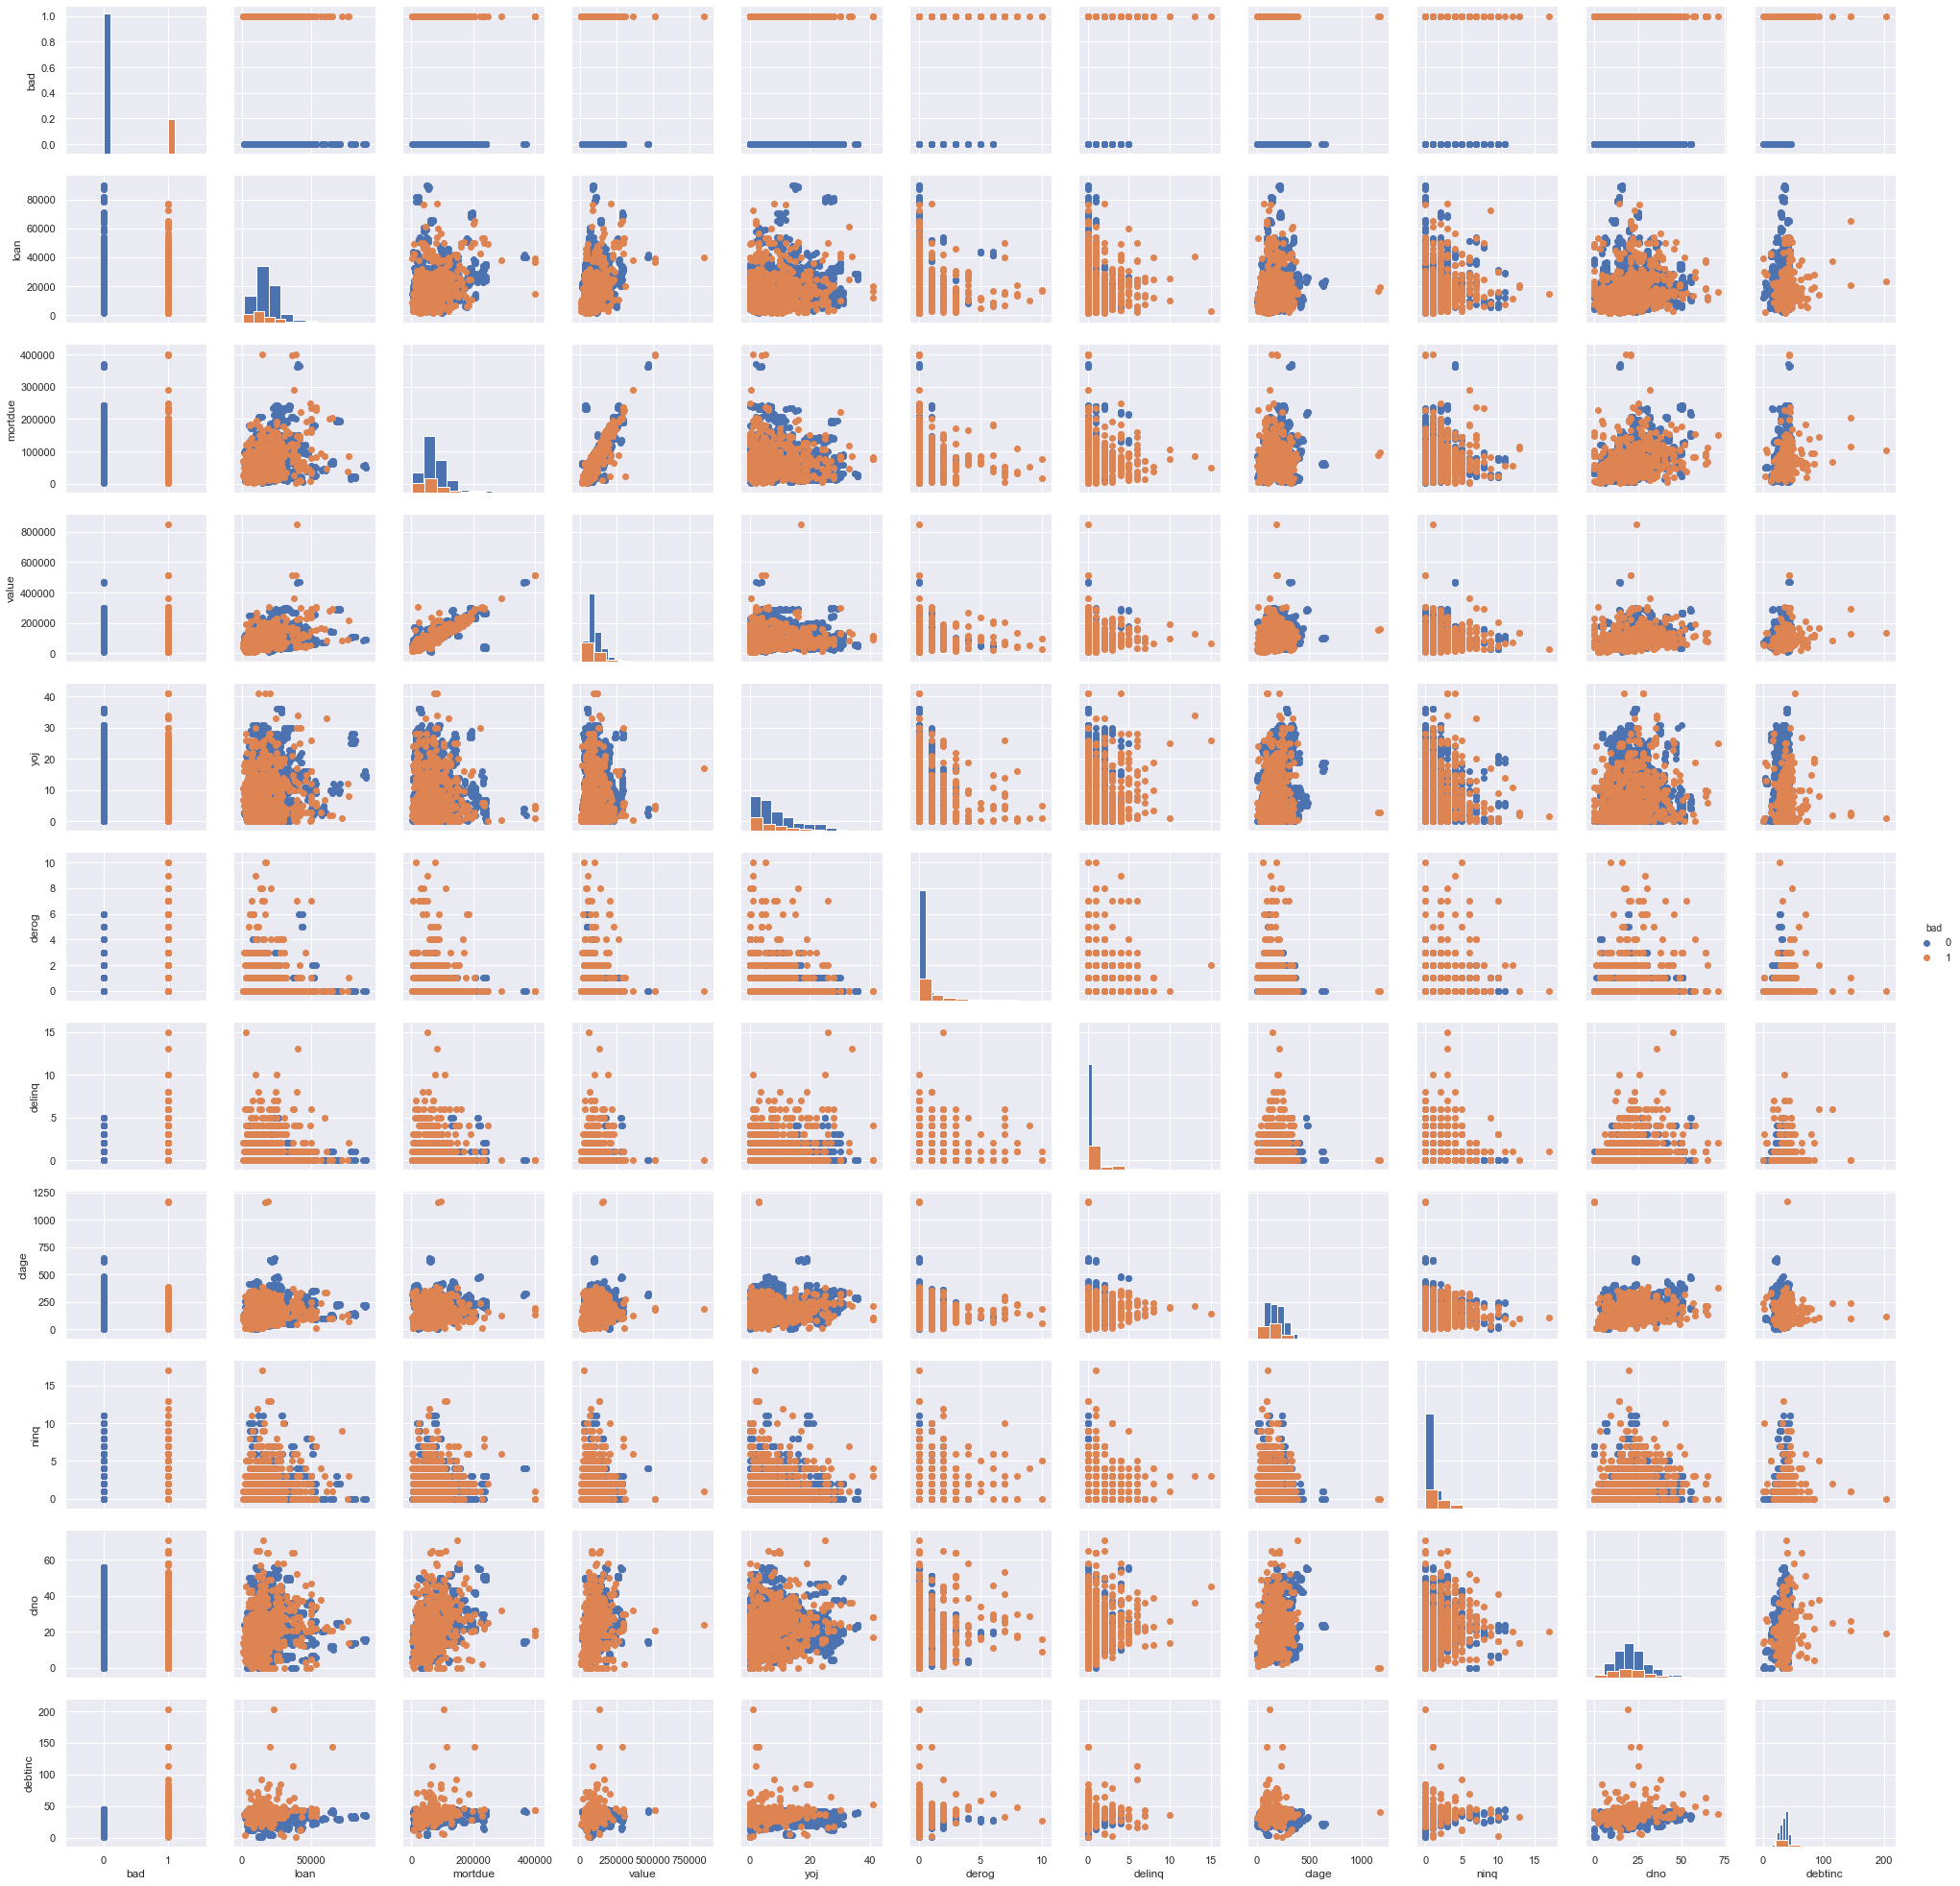

In [26]:
g = sns.PairGrid(df, hue="bad")
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)
g = g.add_legend()

In [33]:
for i in df1.columns[:-1]:
    print (i+" : ")
    
    for j in [0,1]:
        print(j,  shapiro(df1[i][df['bad'] == j]))
    print (" ")

bad : 
0 (1.0, 1.0)
1 (1.0, 1.0)
 
loan : 
0 (0.7956978678703308, 5.885453550164232e-44)
1 (0.9045296311378479, 2.0234531827867386e-09)
 
mortdue : 
0 (0.8787816762924194, 2.5456225563144176e-36)
1 (0.7512526512145996, 3.3890862892696385e-16)
 
value : 
0 (0.8589468598365784, 1.8442751131791746e-38)
1 (0.7333866357803345, 9.111328934567086e-17)
 
yoj : 
0 (0.9125790596008301, 6.363814909348897e-32)
1 (0.8766403794288635, 4.9340385943619225e-11)
 
derog : 
0 (0.3006630539894104, 0.0)
1 (0.4721530079841614, 5.81210879296985e-23)
 
delinq : 
0 (0.3834376335144043, 0.0)
1 (0.6147846579551697, 5.649246795537095e-20)
 
clage : 
0 (0.9353773593902588, 4.0271373285656958e-28)
1 (0.6687158942222595, 1.2689307318202608e-18)
 
ninq : 
0 (0.6640092134475708, 0.0)
1 (0.7351685762405396, 1.0356499792510919e-16)
 
clno : 
0 (0.9631396532058716, 9.864035908434656e-22)
1 (0.9458193778991699, 2.26503107114695e-06)
 


In [39]:
arrr=['derog', 'delinq', 'debtinc',  'ninq'] #levene testini adaylarım için yapıyorum
for i in arrr:
    print(i +" : "+str(levene(df1[i][df['bad']==0], df1[i][df['bad']==1])))

derog : LeveneResult(statistic=119.76642995326307, pvalue=3.782961336911596e-27)
delinq : LeveneResult(statistic=177.9437600150609, pvalue=5.011836866349701e-39)
debtinc : LeveneResult(statistic=127.680234966471, pvalue=8.748739427071007e-29)
ninq : LeveneResult(statistic=20.675290268892137, pvalue=5.750707693245181e-06)
